<a/ id='top'></a>
# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Theodore Margoles

***

This assignment is due on Moodle by **5 PM on Friday 26 October**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [30 points] Problem 1 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$\frac{1}{\pi}\int_0^{\frac{\pi}{2}}\mathrm{cos(x)}+\mathrm{1}{d}x$

$\frac{1}{\pi}[sin(x) + x \mid_0^{\frac{\pi}{2}}]$

$\frac{1}{\pi}[1 + \frac{\pi}{2}]$

== $\frac{1}{\pi}$ + $\frac{1}{2}$

this is the probability that $P(X \le \frac{\pi}{2})$ = $0.81831$

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The ratio of points that fall under the curve $f(x)$ from $x=0$ to $x=\frac{\pi}{2}$ to the total points sampled represents the probability that a given point $(x,y)$ will lie under the curve $f(x)$, $x=0$ to $x=\frac{\pi}{2}$,  because the total points sampled is the sample space, and the number of points under the curve in over the number of points in the sample space is just the probability that a point will lie under the curve in this range. 



**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

In $B$ we saw that this method estimates the probability that a point will lie under the curve in each given rectangle, 

which is equal to the proportion of the curve in each rectangle that is under the curve is proportional to the area

so we could break the range [0, $\pi$] into multiple rectangles [0 --> $\frac{\pi}{n}$], [$\frac{\pi}{n}$ --> $\frac{2\pi}{n}$]...,[$\frac{n-1\pi}{n}$ --> $\pi$] 
then we just sum: $\Sigma_{i=1}^n(P_{Ui})(P_{Ti})$ where $P_{Ui}$ = the proportion of area under the curve of *i*th rectangle * $P_{Ti}$ = the area of *i*th rectangle and so sum all of these up = $\Sigma_{i=1}^n(P_{Ui})(P_{Ti})$ to get the total area which is equal to an approximation of the integral.

**Part D.** Write a function `integrate` to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

yes, as we can see, my estimate does in fact converge to the actual value! this is amazing! 

In [2]:
import math

def getStdev(mean, data):
    varianceList = [((mean-d)**2) for d in data]
    return math.sqrt(sum(varianceList) / len(varianceList))

def F(x):
    return (1/math.pi)*(math.cos(x) + 1)

def isCoordUnderCurve(X, Y): #for built in f(x) = 1/pi * (cos(x) + 1)
    yhat = F(X)
    if Y <= yhat:
        return True
    else:
        return False

def integrate(num_samples, ub, isPlot): #sample X from U(0, ub) and Y from U(0, 1)
    rects = []
    len_rect = ub/num_samples
    cur_pos = 0.0
    prev_pos = 0.0
    area_rect = 1 * len_rect
    value = 0
    Z = 0
    areas = []
    tt2r = []
    x_s = []
    y_s = []
    z_s = []
    for sample in range(num_samples):
        prev_pos = cur_pos
        cur_pos += len_rect
        #for each box we want to  run some number of random choices for X, and Y
        t_res = []
        for trial in range(1000):
            X = np.random.uniform(prev_pos, cur_pos, 1) #get a random X in each rectangle. 
            Y = np.random.uniform(0.0, 1.0, 1) #get a random Y in [0, 1]
            if isCoordUnderCurve(X, Y): 
                Z = 1
            else:
                Z = 0
            t_res.append(Z) #random variable Z representing if point was under curve. Is either true or false at each step.
            x_s.append(X)
            y_s.append(Y)
            z_s.append(Z)
        phat = sum(t_res) / len(t_res)
        area_i = phat * area_rect #multiplying proportion of area under curve times area of each rectangle
        value += area_i
        tt2r.append(phat)
        areas.append(area_i)
    if isPlot:
        plt.plot(x_s, y_s)
    return value
    
ans = integrate(1000, 3.14/2, True)

print("estimation: ", ans)
print("exact answer: ", 1/math.pi + 1/2)
print((1/math.pi + 1/2) - ans, " off from being correct" )

estimation:  0.8180987399999999
exact answer:  0.8183098861837907
0.0002111461837908113  off from being correct
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001A6209BA950> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

**Part E.** In the simulation above, what is distribution of the random variable $Z$ that we're actually sampling? What is/are the parameters of this distribution?  

Z is a bernouli random variable that therefore follows a binomial distribution, and represents the number of points that fall under the curve.
in this case with, N=1000 (hardcoded in my code) and with P = points under f(x) : points total for each rectangular segment. 

Therefore:
$Z$ **~** $Bin(n, p)$ and $p$ = $\frac{1}{ub}$ because this is the ultimate ratio of the area under the curve to the area of the box = $Bin(1000, \frac{1}{ub})$

**Part F.**  Compute the expected value of the random variable you described in **Part E** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you simulated in **Part D**? 

The expected value would be:

$E(Z)$ = $(n)(p)$ = $n(\frac{1}{ub})$

now lets plug in n=1000, and ub = $\frac{\pi}{2}$

so, we get $1000(\frac{2}{\pi})$ = $637$ expected points to be under the curve for a $p$ of $.637$ which is within $.2$ of the actual answer of $0.81$ which I did calculate correctly in **Part A and Part D**.

In [3]:
print("my result was off by: ", 0.81 - 0.637)

my result was off by:  0.17300000000000004


**Part G.** Compute the variance of the random variable you described in **Part E** by hand.  Does this value agree with the sample variance observed in your simulation for **Part D**? 

$Var[Z]$ = $np(1-p)$ = $1000$($\frac{2}{\pi}$)($1-\frac{2}{\pi}$) = $231.335$

yes, the variance should be correct based on my results and calculations. 

In [4]:
print(1000*(2/math.pi)*(1-(2/math.pi)))

231.33503779823025


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you will) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

since the radiation of each donut is a continuos random variable, so too, the mean of each sample of donuts is also a continuous random variable, let U be the continous random variable representing the mean of each batch. 

36 donuts out of 1 of every 5 means we sampled 36 out of 180 total. The probability that the batch is deemed unsafe, is 


$P(U >= 200)$ = $1$ - $P(U <= 200.0)$ = $1$ - $CDF(200)$ =$1 -$ $\int_0^{200}\mathrm{f(x)dx}$ where f(x) is the probability density function. 

We know the mean, and we know the standard deviation so lets model this with a standard normal distribution, since the mean of a normal random variable will also be a normal random variable. 

as n becomes large, $U$ **~** $N(\mu, \frac{\sigma^2}{n})$ == $N(190, \frac{(40^2)}{36})$ by the definition of the distribution of a sample mean. 

let $Z$ = $\frac{U-\mu}{\sigma}$ = $\frac{U-190}{40}$, and note that Z ~ standard normal distr.

now, we can see that we just need to setup the distribution Z, and compute, the CDF of what, well we want to know what, we want to know the probability that the sample mean will be greater than 200, which is 1 - the probability that it is less than 200 which is just the $CDF$($\frac{200-190}{40}$), = $CDF$($\frac{1}{4}$) of the standard normal distrubtion, that is 
everything to the left of .25 standard deviations above the mean, which is, 0.5987 as we can see in the calculation from python
below.

however what we actually need to calculate is P(U>=200)P(U>=200)  = = 1 - CDF(0.25) = 0.4013

In [5]:
print("the probability that the batch must be thrown out is = P(U >= 200) = ", 1 - stats.norm.cdf(0.25))


the probability that the batch must be thrown out is = P(U >= 200) =  0.4012936743170763


**Part B.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean $\mu$ of the donut radiation distribution such that the probability that we will throw donuts out due to safety concerns is at most 0.001? Assume that the variance and sample size remain the same as above.

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

we need to find some mean *$m$*, 

such that the standard normal **CDF**($\frac{m-190}{40}$) $\le$ $0.001$

so lets just use a simple python loop using this logic, 

In [6]:
m = 199.0
cdf = stats.norm.cdf((m-190)/40)
while cdf >= 0.001:
    m = m - 0.1
    cdf = stats.norm.cdf((m-190)/40)
print("the lowest mean that satisfied the requirement was: ", m, " with a p of throwing the batch out of: ", cdf)

the lowest mean that satisfied the requirement was:  66.30000000000754  with a p of throwing the batch out of:  0.0009923911684781067


**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.001. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

we have $0.001$ = $2\frac{\sigma}{\sqrt{n}}$, with $\sigma$ = 40,

$0.001$ = $2\frac{40}{\sqrt{n}}$

so, $\sqrt{n}$ = $\frac{80}{0.001}$, so

$n$ = $\frac{80^2}{0.001^2}$

In [7]:
print("the sample size must be: ", (80**2)/(0.001**2))

the sample size must be:  6400000000.0


**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

maybe radiation has physical properties that make the distribution of effective radiation buildup in reality could follow some other distribution. It could cumulate non-linearly, or could depend on local variation in surface or some other variable. 

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [20 points] Problem 3 - Snappy McChatterson over here

**Part A:** Your friends are really texting a lot of messages to your Snap Chat. You start your stopwatch and record the time when each Snap Chat text message comes in. The data are found in `SnappedChats.csv`.

Load them in using whatever method you prefer, compute the time span between successive snaps, and plot a density histogram of those inter-snap arrival times.

Your histogram should be gold with black edges (sko buffs) and have 50 bins. Be sure to label your axes and include a legend.


        snaps
0   18.624919
1   36.219692
2   51.473715
3   77.175829
4  104.218201


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6216CB160>],
      dtype=object)

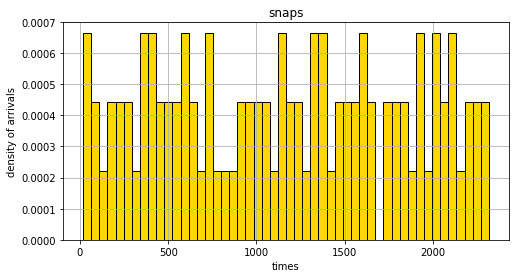

In [8]:
SnapData = pd.read_csv("SnappedChats.csv")
print(SnapData.head())
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("times")
ax.set_ylabel("density of arrivals")
my_bins = [i for i in range(18, 2337, 46)]
SnapData.hist(ax=ax, bins=my_bins, facecolor="gold", edgecolor="black",density=True)

**Part B:** Compute a 90% confidence interval (to 4 decimal places) for the mean of the inter-snap arrival time. If you use any theorem(s) in your calculation, be sure to state what they are and why the theorem(s) can be applied. 

for this problem I will apply the Central Limit Theorem in assuming the standard deviation of the mean is close to normally distributed with a standard deviation of $\frac{\sigma}{\sqrt{n}}$. 

the standard deviation $\sigma$ will just be calculated from the data, as well as the mean $\mu$ (both with python below)

the upperbound of the confidence interal is going to be $\mu$ + $1.645\frac{\sigma}{\sqrt{n}}$

the upperbound of the confidence interal is going to be $\mu$ - $1.645\frac{\sigma}{\sqrt{n}}$

and now we can just plug in $\sigma$ = $684.3220$ and $\mu$ = $1181.9995$

$1181.9995$ - $1.645\frac{684.3220}{10}$ = $1069.43$
$1181.9995$ + $1.645\frac{684.3220}{10}$ = $1294.57$

therefore the $90%$ $CI$ is [$1069.4285$, $1294.5705$]

In [9]:
def getStdev(mean, data):
    varianceList = [((mean-d)**2) for d in data]
    return math.sqrt(sum(varianceList) / len(varianceList))
v = stats.norm.ppf(1-(0.1/2))
print(v)
sumsnaps = 0
for snap in SnapData["snaps"]:
    sumsnaps += snap
meanSnap = sumsnaps / len(SnapData["snaps"])
print(meanSnap)
stDev = getStdev(meanSnap, SnapData["snaps"])
upperBound = 1181.9996 + (v*((stDev)/(math.sqrt(len(SnapData["snaps"])))))
lowerBound = 1181.9996 - (v*((stDev)/(math.sqrt(len(SnapData["snaps"])))))

print("The 90% CI for the true sample mean: [",lowerBound, upperBound, "]")
print("The standard deviation is: ", stDev)
print("The sample mean is: ", meanSnap)
print("The sample size is: ", len(SnapData["snaps"]))

1.6448536269514722
1181.999582035037
The 90% CI for the true sample mean: [ 1069.438639567569 1294.5605604324312 ]
The standard deviation is:  684.3220490144677
The sample mean is:  1181.999582035037
The sample size is:  100


**Part C:** Speculate: what would happen if you hadn't included all the data in your confidence interval calculation above? Specifically, if you used only 30 of your data points to compute a confidence interval, would it be wider or less wide? Why?

If I use fewer data points the confidence interval should be wider because we should be able to make predictions with less confidence the less data we use to form the confidence interval. If I have thousands of data points, I can form a tight confidence interval because I can see the larger scale pattern of where data is likely to fall, but if I I have only a few data points to look at I cant see all the patterns in the data, well the same is true from a mathematical standpoint; when we build the confidence interval we can be more confident that the true mean is in a tighter range, and if we have less data, we can categorically say less, so the interval is wider.

**Part D:** Write a function to confirm what you have written above. For each value of $n$ between $30$ and the total number of data points, compute a 90% CI using the first $n$ inter-arrival times. Plot the CIs (vertical axis) against $n$ (horizontal axis). Plot the means as black X symbols, with vertical "errorbars" for the CIs colored gold. See Matplotlib's [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html) plot type. 

[113, 115, 117, 119, 120, 123, 126, 129, 132, 135, 137, 139, 142, 144, 146, 149, 151, 153, 155, 157, 159, 160, 162, 164, 165, 167, 169, 170, 172, 173, 174, 176, 177, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 193, 194, 196, 197, 198, 200, 201, 203, 204, 205, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224]


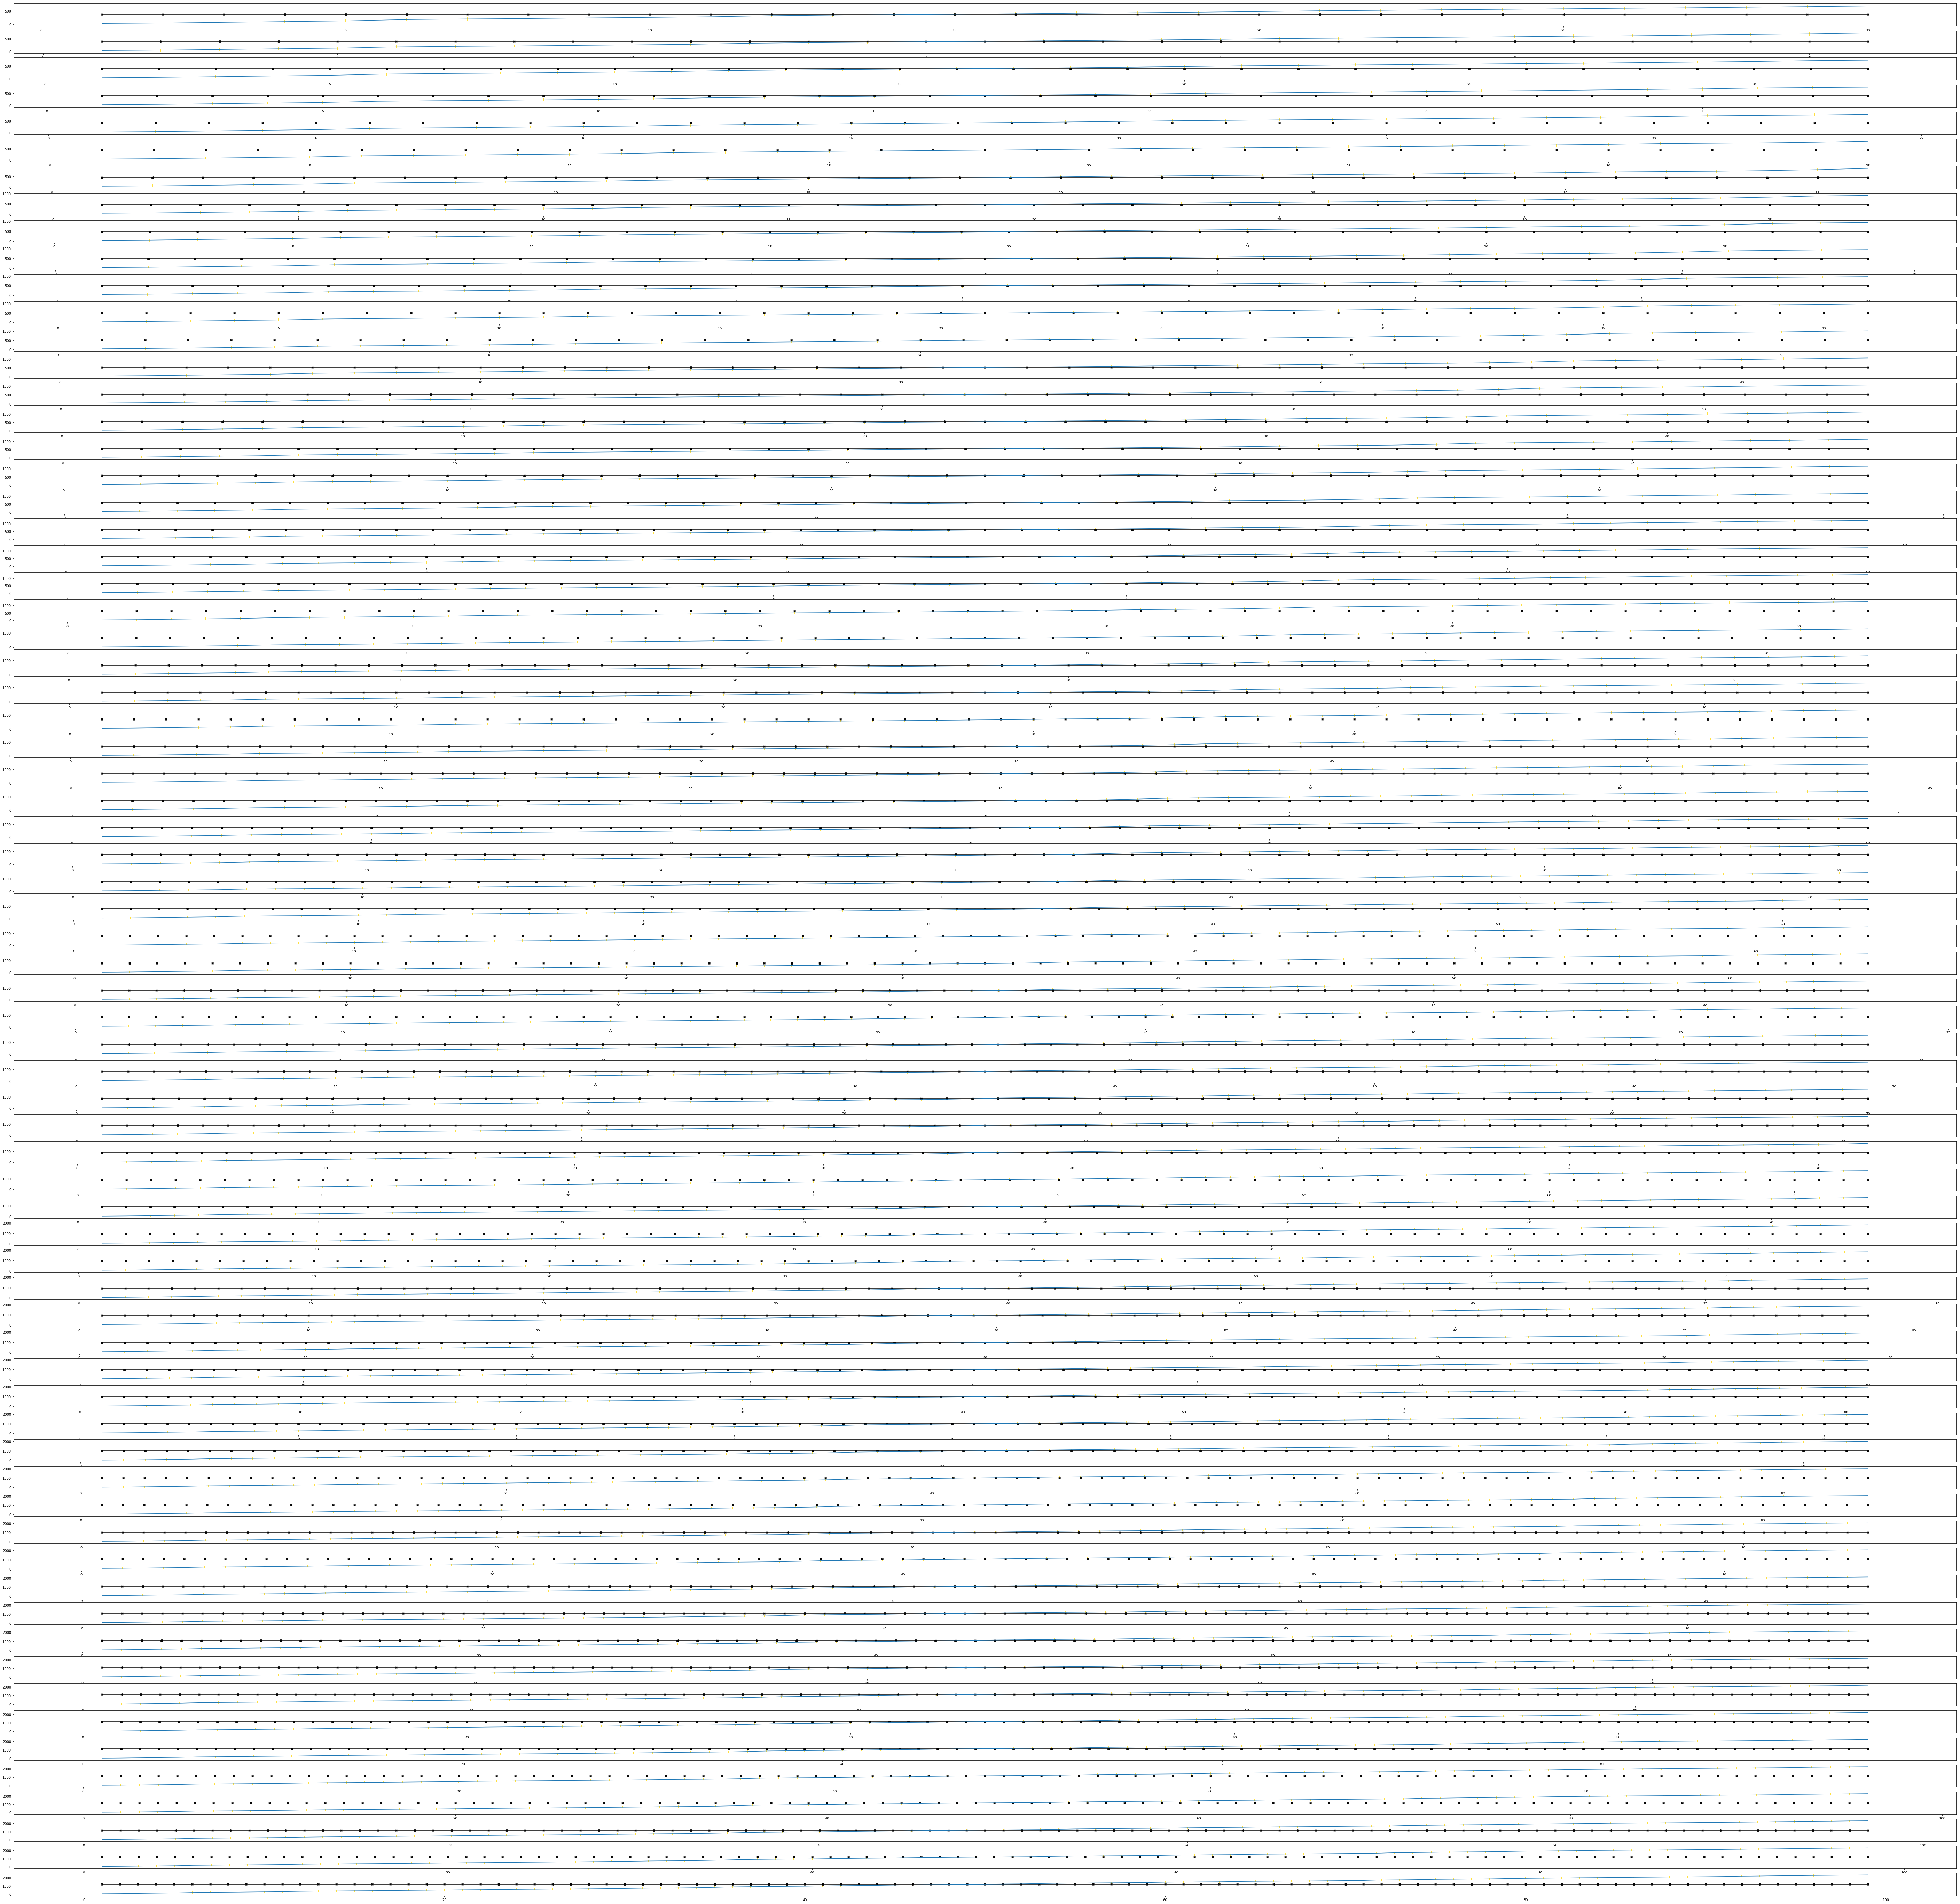

In [10]:
def confidenceOfN():
    fig, axes = plt.subplots(nrows=70, ncols=1, figsize=(100, 100))
    all_data = []
    param = stats.norm.ppf(1-(.1/2))
    conf_arry = []
    mean_arry = []
    stdev_arry = []
    hi_bounds = []
    ranges = []
    lo_bounds = []
    ind = 0
    delta = 1
    for n in range(30, 100):
        dta = []
        for i in range(1, n+1):
            dta.append(SnapData["snaps"][i])
        all_data.append(dta)
        mn = sum(dta) / len(dta) #get mean
        std = getStdev(mn, dta) #get standard deviation. 
        upperBound = mn + (param*((std)/(math.sqrt(n))))
        lowerBound = mn - (param*((std)/(math.sqrt(n))))
        conf_arry.append((lowerBound, upperBound))
        mean_arry.append(mn)
        stdev_arry.append(std)
        hi_bounds.append(int(upperBound))
        lo_bounds.append(int(lowerBound))
        ranges.append(int(upperBound - lowerBound))
        dbuff = []
        mrry = []
        nbuff = []
        for j in range(1, n+1):
            mrry.append(mn)
            nbuff.append(j)
        axes[n-30].errorbar(nbuff, dta, yerr=(param*((std)/(math.sqrt(n)))), ecolor="gold", capthick=10)
        axes[n-30].plot(nbuff, mrry, marker='X', color="black")
        ind += delta
        if ind == 10:
            delta = -1
        if ind == 0:
            delta = 1
    print(ranges)
        
   
    plt.show()
    

confidenceOfN()

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [25 points] Problem 4 - Not-so-Easy Peasy Plinko 

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.

In class we looked at a simplified version of Plinko:  

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko1.png)

In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko2.png)


**Part A**: First, let's consider the case without boundaries. 

**[1]** Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least 10,000 trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left when hitting a peg is equal to `p_right = 0.5`. Note that in this set-up, you must always drop the disc above bin 3.

Your code should take as arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg

Your code should return some kind of an array-like object that can be used to plot a histogram of the results of your `n` Plinko games.

**[2]** Then, plot a density histogram of the results.  Run your simulation for at least 10,000 trials.  The bins should be centered above the corresponding bin numbers, and axes should be labeled appropriately.

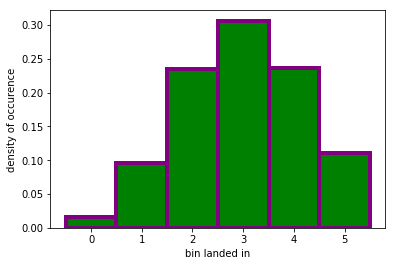

In [11]:
choose = ["Left", "Right"]

def simPlinko(n, p_right):
    game_results = []
    for _ in range(n):
        pos = 3
        for step in range(1, 7):
            bounce = np.random.choice(choose, p=[1-p_right, p_right], size=1)
            if bounce == "Left":
                pos = pos - 0.5
            else:
                pos = pos + 0.5
        game_results.append(pos)
    bins = [i for i in range(0, 7)]
    plt.hist(game_results, bins=bins, align="left", edgecolor="purple", color="green", linewidth=4, density=True)
    plt.xlabel("bin landed in")
    plt.ylabel("density of occurence")
    plt.show()

simPlinko(10000, 0.5)
            
    

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in for the situation in **Part A**.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

**Then**, check that your empirical (estimated) probabilities for landing in Bucket 0, 1, 2, or 3 compare to the true probabilities. Comment on whether or not they agree, and be sure to clearly state what the probabilities you've calculated are.

since each plinko level is just a bernouli trial, the plinko game will have outcomes following a Bin(n, p) distribution. 

with n=6 and p=0.5 for our purposes here. $X$ **~ $Bin(6, 0.5)$ **

now, we just need to recall what the PMF is for a Binomial distribution. 

the **$PMF$** for **$X$** = $P(x = k)$ = $n\choose{k}$$p^k(1-p)^{n-k}$, 

so, $P(x = 0)$ = $6\choose{0}$$(0.5)^0(0.5)^{6}$ == $0.5^6$  = $0.015625$.


and $P(x = 1)$ = $6\choose{1}$$(0.5)^1(0.5)^{5}$ == $0.5^6$ = $0.015625$.


$P(x = 2)$ = $6\choose{2}$$(0.5)^2(0.5)^{4}$ == $15(0.5)^6$ = $0.234375$.


$P(x = 3)$ = $6\choose{3}$$(0.5)^3(0.5)^{3}$ == $20(0.5)^6$ = $0.3125$.


yes, these probabilities appear to match the histogram above for $p = 0.5$, with a little bit of variation. 

**Part C.** 

**[1]** Now write a simulator for Plinko with boundaries, and an argument for the number of rows. Your code should be similar to your code from **Part A**, with the following arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg
* `left_bound` -- the left boundary
* `right_bound` -- the right boundary
* `initial` -- the initial bin that you drop the disc above
* `n_rows` -- number the rows on the plinko board. The board must have number of pegs in the bottom row equal to `n_rows`.

**[2]** As a sanity check, use a 1-row board with `p_right=0.85`, and no left/right boundaries.  Run 10,000 trials and plot a density histogram of the results. The bins should be centered above the corresponding bin numbers, and the axes should be labeled. Does your result match you expect should happen? Explain.

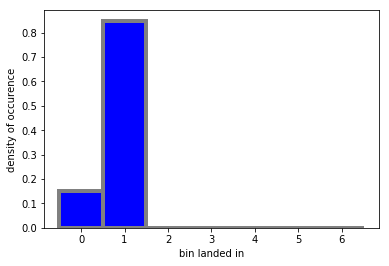

In [12]:
def PlinkoBounded(n, p_right, left_bound, right_bound, initial, n_rows):
    results = []
    bank = ["Left", "Right"]
    for _ in range(n):
        pos = initial
        for __ in range(n_rows):
            bounce = np.random.choice(bank, p=[1-p_right, p_right], size=1)
            if pos > left_bound and pos < right_bound: #if we are not worried about going out of bounds just let game play on
                if bounce == "Left":
                    pos = pos - 0.5
                else:
                    pos = pos + 0.5
            if pos <= left_bound: #if we are at the left or right bound
                if bounce == "Left":
                    pos = pos
                else:
                    pos = pos + 0.5
            if pos >= right_bound: #same case but for right bound
                if bounce == "Left":
                    pos = pos - 0.5
                else:
                    pos = pos
        results.append(pos)
    bins = [i for i in range(0,8)]
    plt.hist(results, bins=bins, align="left", edgecolor="grey", color="blue", linewidth=4, density=True)
    plt.xlabel("bin landed in")
    plt.ylabel("density of occurence")
    plt.show()
    


PlinkoBounded(10000, 0.85, 0, 1, 0.5, 1)        
        

Yes, the above histogram indeed does match my results, there is a large prevalence of the plinko falling to the right which matches my p value, and we can see after falling onto a one row board the only other value that it could hold is 0 with significantly less density of occurence. 

**Part D.**  Run 10,000 trials with left and right boundaries at 0.5 and 5.5, respectively, and a 6-row board. Drop the disc above Bin 3. Plot a density histogram of the results, simiarly to **Part C**.

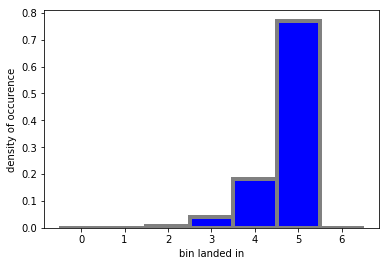

In [13]:
PlinkoBounded(10000, 0.85, 0.5, 5.5, 3, 6)

**Part E**:  Let $X$ be the random variable corresponding to the Bucket that the disc lands in for the situation in **Part D**.  Compare the approximate PMF for this board to the no-boundary board from **Part A/B**. Explain the mechanism that causes the differences between the two PMFs in words. Then, write down the **true** PMF for $X$.

The PMF for this board with boundaries is essentially the same if we then sqeezed the tails of the distribution in, forcing all the probability density that would inhabit the buckets outside of the boundaries now gets pushed into the center; within the upper and lower bound. The true PMF is still however Bin(n, p) distribution. 

$P(x=k)$ = $ub - lb\choose{k}$$p^k(1-p)^{ub-lb-k}$ where $lb$ is lower bound and $ub$ is the upper bound, since this is the new number of buckets we actually have to choose from in this Binomial distribution. 

**Part F**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Parts D** and **E**.
* If the disc lands in bins 1 or 5, I will pay you \$1
* If the disc lands in bin 3, I will pay you \$4
* If the disc lands in bins 2 or 4, I will pay you nothing
* I will also charge you a flat fee for each disc that you play.

How much should I charge you per disc so that we break even in the long run? 

What we have is a random variable $W$ describing the winnings you would get, and the first thing we need to do is compute your expected winnings so we know how much to charge you per turn. 

$E[W]$ = $\Sigma_i{w_i}P(W = w_i)$
once we expand out the formula we can see that we are really just solving this equation for F


$= P(1)(1) + P(5)(1) + P(3)(4) + P(2)(0) + P(4)(0) - F == 0$ where F is the flat fee

left = 0.5, 
right = 5.5, 

P(1) = ${5.5-0.5}\choose{1}$$0.85^1(0.15)^{5.5-0.5-1}$

P(1) = $0.0004$
P(2) = $5\choose{2}$$0.85^2(0.15^3)$ = $0.02438$
P(3) = $5\choose{3}$$0.85^3(0.15^2)$ = $0.13818$
P(5) = $1$$0.85^5(1)$ = $0.4437$

so know lets plug all of these values into the equation to get:

$F$ = 0.0004(1) + 0.4437(1) + 0.13818(4) + 0 + 0

$F$ = the flat fee = 0.996 dollars = 99.6 cents, rounds up to 100 cents = 1 dollar per turn to break even.

In [14]:
print(0.0004 + 0.4437 + (0.13818*4))

0.99682


***

### Challenge Fun Problem [0 points] - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 


<br>

---
### Notes

<a/ id='rad'></a> 200 mSv is somewhere below Chernobyl levels of exposure, but more radiation than you would want with regard to potentially increasing your risk of cancer. It's probably too high, but it is a nice round number! More information [here](https://www.theguardian.com/news/datablog/2011/mar/15/radiation-exposure-levels-guide).

[Back to Problem 2](#p2)